<a href="https://colab.research.google.com/github/Meenakshigupta6527/EDA-for-Real-Estate-Pricing/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#mounting Google Drive in Google Colab

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [59]:
#loading dataset

df_new=pd.read_csv('/content/drive/MyDrive/df_new.csv')
df_new

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,254,SC20,RL,70,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2010,WD,Normal,145000
1,1066,SC60,RL,59,7837,Pave,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,May,2009,WD,Normal,178000
2,638,SC30,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,May,2008,WD,Normal,85000
3,799,SC50,RL,60,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,No,MnPrv,No,0,Jun,2007,WD,Normal,175000
4,380,SC50,RL,50,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,May,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1095,SC20,RL,78,9317,Pave,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Mar,2007,WD,Normal,176432
1116,1130,SC50,RL,65,7804,Pave,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Dec,2009,WD,Normal,135000
1117,1294,SC20,RL,60,8172,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2006,WD,Normal,115000
1118,860,SC50,RL,55,7642,Pave,Reg,Lvl,AllPub,Corner,...,0,No,GdPrv,No,0,Jun,2007,WD,Normal,189950


In [60]:
#loading test dataset

test=pd.read_csv('/content/drive/MyDrive/test.csv')
test

,Unnamed: 0,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,0,1.0,0.0,0.500,0.643411,0.883333,1.00,1.000000,0.333333,1.000000,1.0,0.153285,1.000000,0.000000,0.0,0.666667,0.25,1.0
1,1,0.0,0.0,0.750,0.883721,0.750000,0.00,0.000000,0.333333,0.000000,1.0,0.558394,0.666667,0.666667,0.0,0.666667,0.50,1.0
2,2,1.0,0.0,0.375,0.364341,0.000000,1.00,1.000000,1.000000,0.666667,1.0,0.142857,1.000000,0.333333,0.8,1.000000,0.50,1.0
3,3,1.0,0.0,0.500,0.519380,0.000000,1.00,1.000000,0.000000,0.000000,1.0,0.308655,1.000000,0.666667,0.8,1.000000,0.50,1.0
4,4,0.0,0.0,0.875,0.984496,0.966667,0.00,0.333333,0.333333,0.000000,1.0,0.297185,0.000000,0.333333,0.0,0.000000,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,1.0,0.0,0.250,0.441860,0.833333,0.25,1.000000,0.833333,1.000000,1.0,0.169708,1.000000,0.000000,0.8,1.000000,0.50,1.0
288,288,0.0,0.0,0.625,0.968992,0.916667,0.00,0.000000,0.000000,0.000000,1.0,0.273723,0.666667,0.333333,0.0,0.000000,0.50,1.0
289,289,1.0,0.0,0.625,0.968992,0.916667,0.50,0.000000,0.333333,0.000000,1.0,0.254432,0.666667,0.333333,0.0,0.000000,0.50,1.0
290,290,1.0,0.0,0.250,0.465116,0.000000,1.00,0.666667,1.000000,1.000000,1.0,0.268509,1.000000,0.333333,0.8,1.000000,0.25,0.5


In [61]:
df_new.drop(['Unnamed: 0'],axis=1, inplace=True)
df_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC20,RL,70,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Jun,2010,WD,Normal,145000
1,SC60,RL,59,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,May,2009,WD,Normal,178000
2,SC30,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,May,2008,WD,Normal,85000
3,SC50,RL,60,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,No,MnPrv,No,0,Jun,2007,WD,Normal,175000
4,SC50,RL,50,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,May,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,SC20,RL,78,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Mar,2007,WD,Normal,176432
1116,SC50,RL,65,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,Dec,2009,WD,Normal,135000
1117,SC20,RL,60,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Apr,2006,WD,Normal,115000
1118,SC50,RL,55,7642,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,No,GdPrv,No,0,Jun,2007,WD,Normal,189950


In [62]:
test.drop(['Unnamed: 0'],axis=1, inplace=True)
test

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.0,0.0,0.500,0.643411,0.883333,1.00,1.000000,0.333333,1.000000,1.0,0.153285,1.000000,0.000000,0.0,0.666667,0.25,1.0
1,0.0,0.0,0.750,0.883721,0.750000,0.00,0.000000,0.333333,0.000000,1.0,0.558394,0.666667,0.666667,0.0,0.666667,0.50,1.0
2,1.0,0.0,0.375,0.364341,0.000000,1.00,1.000000,1.000000,0.666667,1.0,0.142857,1.000000,0.333333,0.8,1.000000,0.50,1.0
3,1.0,0.0,0.500,0.519380,0.000000,1.00,1.000000,0.000000,0.000000,1.0,0.308655,1.000000,0.666667,0.8,1.000000,0.50,1.0
4,0.0,0.0,0.875,0.984496,0.966667,0.00,0.333333,0.333333,0.000000,1.0,0.297185,0.000000,0.333333,0.0,0.000000,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.0,0.0,0.250,0.441860,0.833333,0.25,1.000000,0.833333,1.000000,1.0,0.169708,1.000000,0.000000,0.8,1.000000,0.50,1.0
288,0.0,0.0,0.625,0.968992,0.916667,0.00,0.000000,0.000000,0.000000,1.0,0.273723,0.666667,0.333333,0.0,0.000000,0.50,1.0
289,1.0,0.0,0.625,0.968992,0.916667,0.50,0.000000,0.333333,0.000000,1.0,0.254432,0.666667,0.333333,0.0,0.000000,0.50,1.0
290,1.0,0.0,0.250,0.465116,0.000000,1.00,0.666667,1.000000,1.000000,1.0,0.268509,1.000000,0.333333,0.8,1.000000,0.25,0.5


In [63]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1120.0,56.218750,35.170406,0.0,39.75,61.000000,78.00,313.0
LotArea,1120.0,10278.285714,8818.181146,1300.0,7500.00,9500.000000,11405.25,164660.0
OverallQual,1120.0,6.009821,1.272129,1.0,5.00,6.000000,7.00,10.0
OverallCond,1120.0,5.599107,1.118134,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1120.0,1969.834821,30.474626,1872.0,1953.00,1971.000000,1999.25,2009.0
YearRemodAdd,1120.0,1984.104464,20.746712,1950.0,1965.00,1993.000000,2003.00,2010.0
MasVnrArea,1120.0,91.139286,153.457834,0.0,0.00,0.000000,147.00,1047.0
BsmtFinSF1,1120.0,420.453571,432.668672,0.0,0.00,372.500000,694.25,5644.0
BsmtFinSF2,1120.0,45.713393,158.913584,0.0,0.00,0.000000,0.00,1127.0
BsmtUnfSF,1120.0,563.123214,433.561073,0.0,217.75,480.000000,808.50,1907.0


In [64]:
df_new['SalePrice'].describe()

count      1120.000000
mean     171253.283929
std       58630.179465
min       34900.000000
25%      129500.000000
50%      161625.000000
75%      205000.000000
max      340000.000000
Name: SalePrice, dtype: float64

#**Our target feature is a continuous variable with values ranging from 34900 to 340000.**
#**The average sale price of all the houses in our dataset is 171253.**datas





In [65]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df_new['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=df_new['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")

#**Graph outcome :**


1.   This plot shows the distribution of sale prices and a box plot
of the same data.
4.    The box plot gives us a summary of the data, showing the median, quartiles, and outliers.
5.    The median sale price is around 180k, and the majority of houses were sold between 130k and 220k.

6.    There are some outliers with sale prices above 300k.





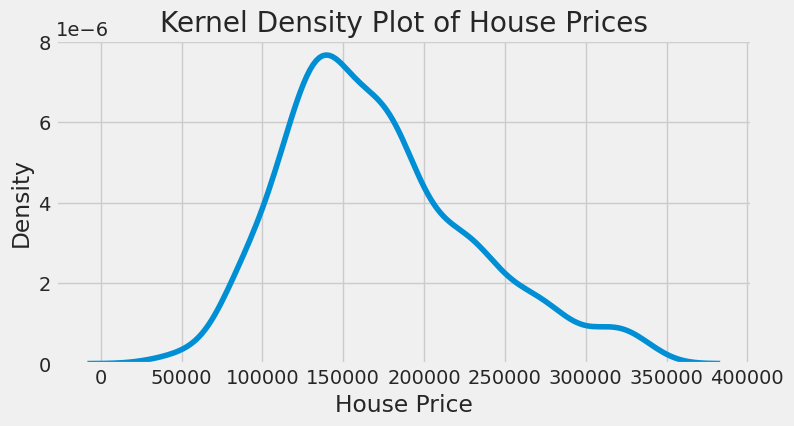

In [66]:
# Kernel density plot of house prices

plt.figure(figsize=(8, 4))
sns.kdeplot(df_new['SalePrice'])
plt.xlabel('House Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of House Prices')
plt.show()

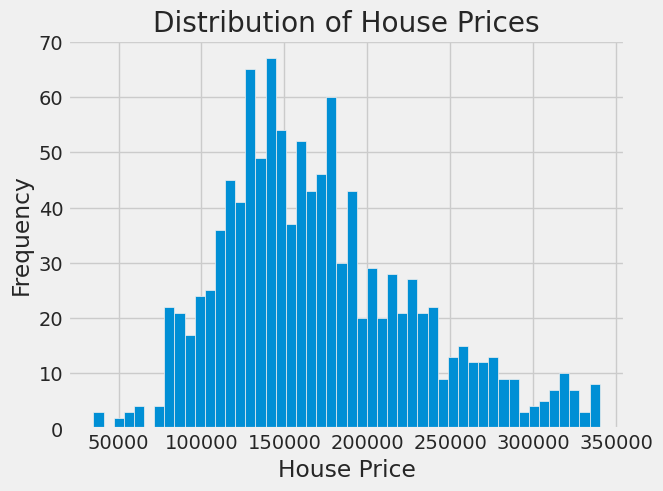

In [67]:
# Histogram of house prices
plt.hist(df_new['SalePrice'], bins=50)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

#**Numerical Analysis**
#1. There are two types of numerical features:-
#a. Discrete
#b. Continuous

#**first we separate discrete features**

In [68]:
discrete=[]
for col in df_new.columns:
    if df_new[col].dtype=='int64' and len(df_new[col].unique()) <=15:
        discrete.append(col)

print("Discrete Features :: \n\n{}".format(discrete))

Discrete Features :: 

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'YrSold']


In [69]:
#Let's have a look at the unique values of each of these features
for col in discrete:
    print("{} has {} unique values.".format(col,df_new[col].unique()))

OverallQual has [ 5  6  4  8  7  3 10  9  1  2] unique values.
OverallCond has [6 7 5 8 4 9 3 2 1] unique values.
BsmtFullBath has [1 0 2 3] unique values.
BsmtHalfBath has [0 1 2] unique values.
FullBath has [1 2 0 3] unique values.
HalfBath has [0 1 2] unique values.
BedroomAbvGr has [3 2 4 6 5 0 1 8] unique values.
KitchenAbvGr has [1 2 3 0] unique values.
TotRmsAbvGrd has [ 5  7  4  6  8 12 10  9  3 11  2 14] unique values.
Fireplaces has [0 1 2 3] unique values.
GarageCars has [1 2 0 4 3] unique values.
3SsnPorch has [  0 162 144 180 320 407 130 216 196 168 290 245 182 140 508] unique values.
PoolArea has [  0 648 480 512 519 738] unique values.
YrSold has [2010 2009 2008 2007 2006] unique values.


#**Now we can analyze the rest of the continuous numerical features**


In [70]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them later.

num = []

for col in df_new.columns:
    if df_new[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [71]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


#We'll have a look at the correlation between all the features with the help of Heatmap.

#**Multivariate Analysis**

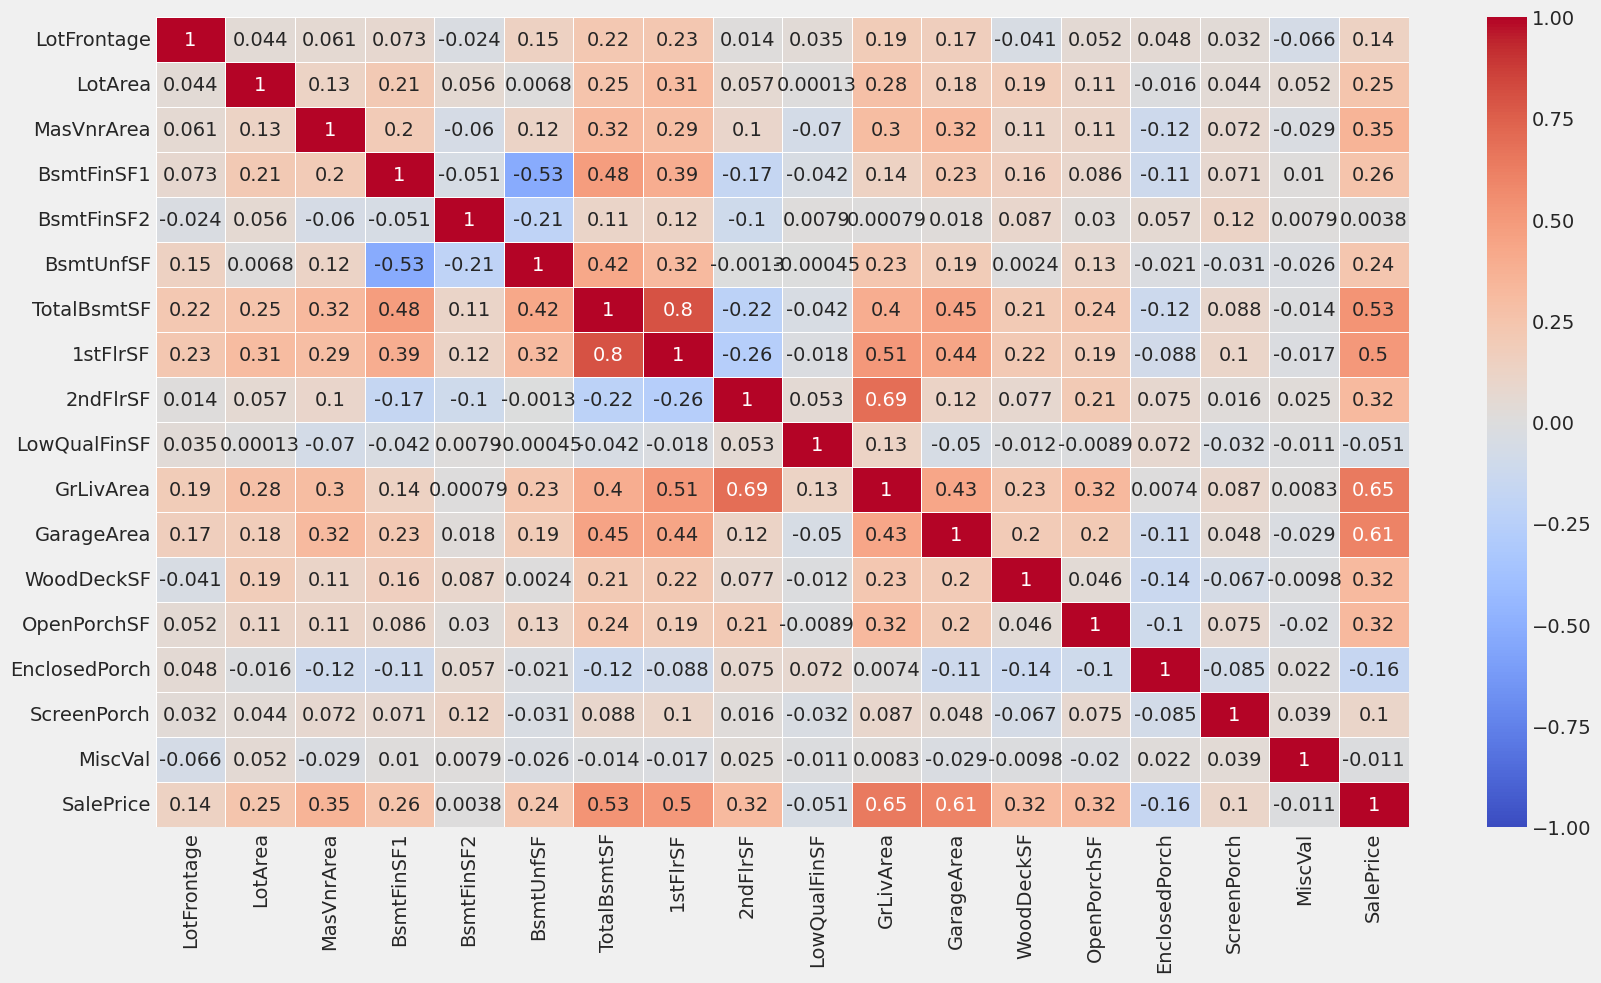

In [72]:
#First ten features

df_corr = df_new[num].iloc[:,0:20]
df_corr['SalePrice'] = df_new['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);



1.   here Ground living Area has a positive correlation of 0.65 with Sale Price.
2.   Garage Area is having a positive correlation of 0.61.
3. TotBsmtSF feature has a 0.53 correlation with SalePrice.






In [73]:
fig = make_subplots(rows=2, cols=2)

high_related = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

i=0
for row in range(1,3):
    for col in range(1,3):
        fig.add_trace(go.Scatter(y=df_new['SalePrice'],x=df_new[high_related[i]],name=high_related[i],
                                mode='markers'),row=row,col=col)
        i+=1
fig.update_layout(height=700, showlegend=True,title_text="Positive Correlated features with Sale Price")
fig.show()

#Outcome: We can see that as the features on xaxis increases , Sale Price also increases.This shows the positive correlation between them.

#**Datetime Features**

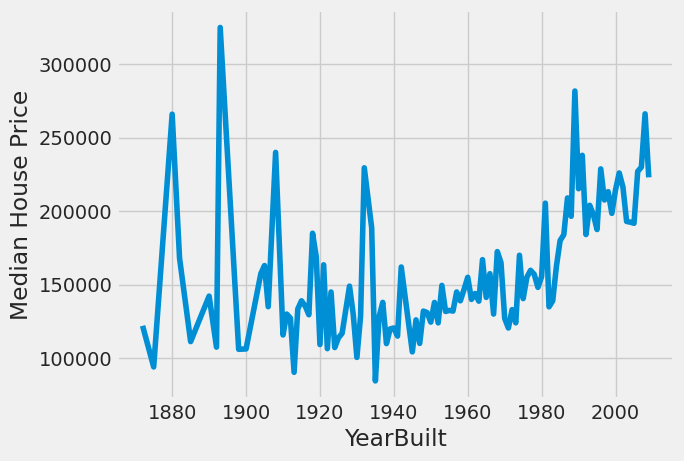

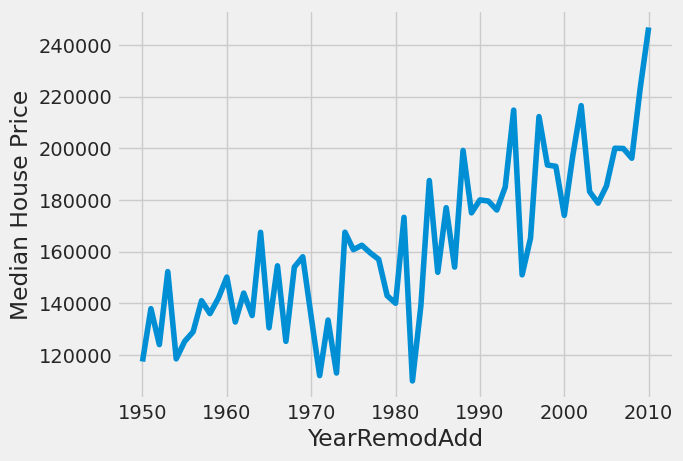

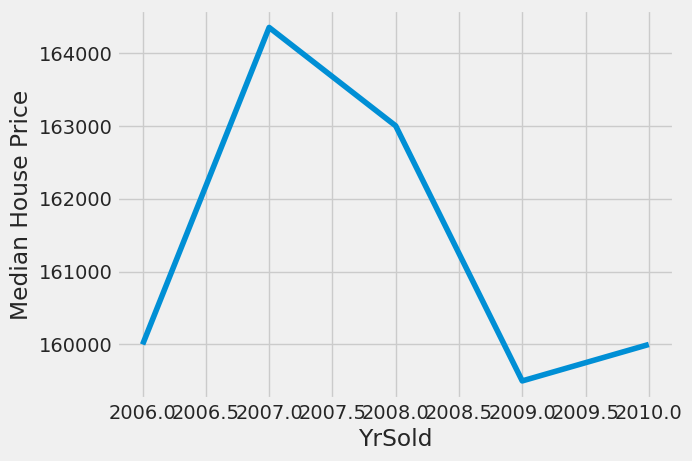

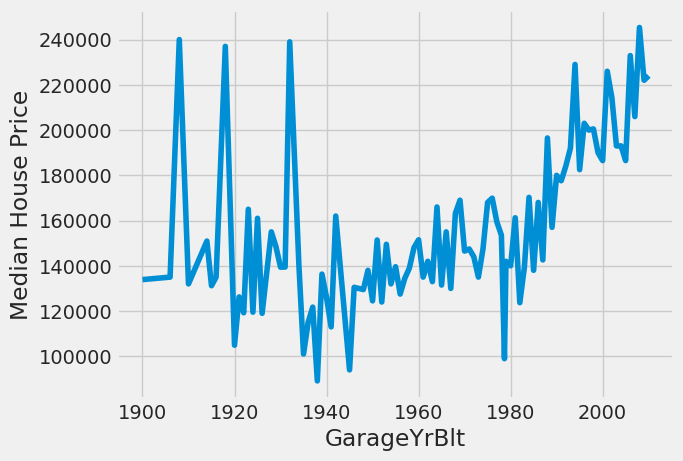

In [74]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df_new.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

##1. With every year , House price increases.
##2. But ,Year Sold feature the Price falls down with each year then it again increases.

#Now we'll make a predictive model for predicting Sale Price.

In [105]:
import copy
dataset = df_new.copy()

In [106]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC20,RL,70,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Jun,2010,WD,Normal,145000
1,SC60,RL,59,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,May,2009,WD,Normal,178000
2,SC30,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,May,2008,WD,Normal,85000
3,SC50,RL,60,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,No,MnPrv,No,0,Jun,2007,WD,Normal,175000
4,SC50,RL,50,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,May,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,SC20,RL,78,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Mar,2007,WD,Normal,176432
1116,SC50,RL,65,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,Dec,2009,WD,Normal,135000
1117,SC20,RL,60,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Apr,2006,WD,Normal,115000
1118,SC50,RL,55,7642,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,No,GdPrv,No,0,Jun,2007,WD,Normal,189950


In [76]:
#This step we'll extract the features from the dataset with high skewness for applying log transformation.

datetime=['YearBuilt','YearRemodAdd','MoSold','YrSold']

#Extracting continuous variables from the dataset
continuous=[]
for col in dataset.columns:
    if dataset[col].dtype!='O' and len(dataset[col].unique()) >16 and col not in datetime:
        continuous.append(col)

#Extracting features with skewness more than and less than zero
skewed_features=[]
for col in continuous:
    if dataset[col].skew()>0 or dataset[col].skew()<0:
        skewed_features.append(col)

#Creating a final list of features for applying log transformation
apply_log=[]
for col in skewed_features:
    if 0 not in dataset[col].unique():
        apply_log.append(col)


#Before log transformation
print("Before Log Transformation........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))

#Applying log transformation
for feature in apply_log:
    dataset[feature]=np.log(dataset[feature])

#After log transformation
print("\nAfter Log Transformation.........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))

Before Log Transformation........................
LotArea --- 11.349008615170836
1stFlrSF --- 1.4829372722450274
GrLivArea --- 1.3717475304063724
GarageYrBlt --- -0.6533364860724618
SalePrice --- 0.6820556420198136

After Log Transformation.........................
LotArea --- -0.25633877732646676
1stFlrSF --- -0.04030604635917538
GrLivArea --- -0.08184015284055014
GarageYrBlt --- -0.6779648823904373
SalePrice --- -0.30204762044966693


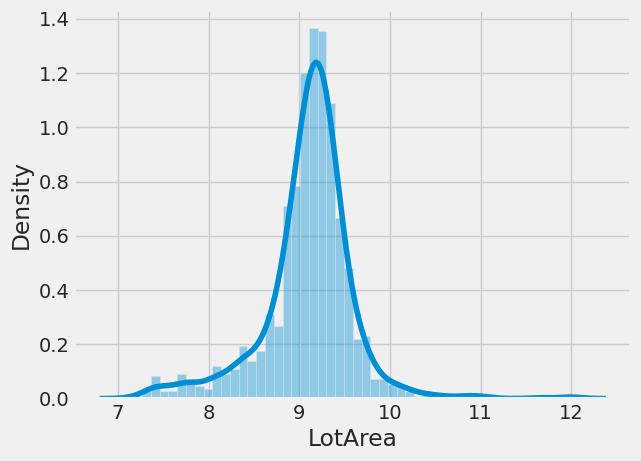

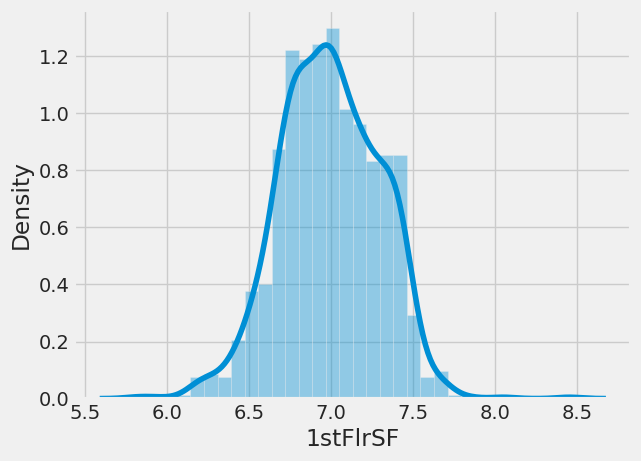

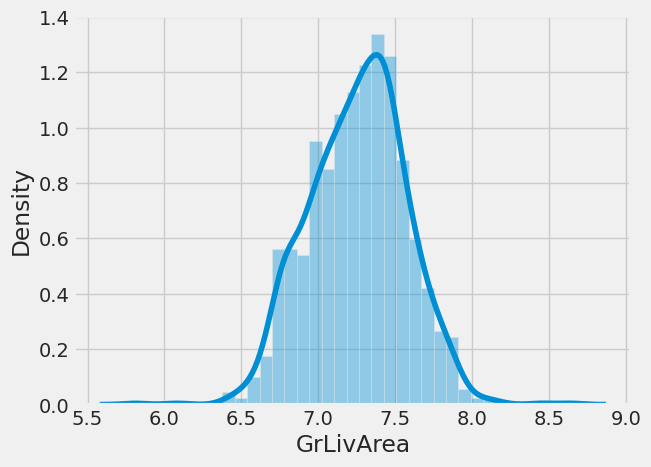

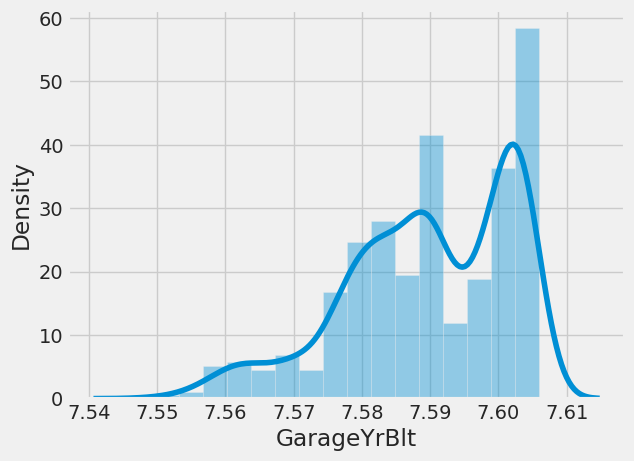

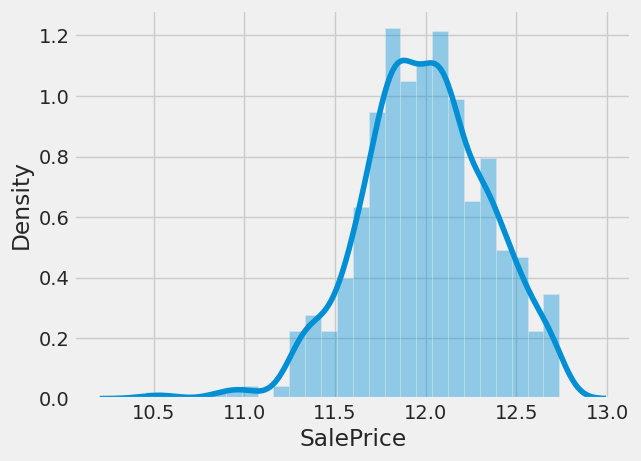

In [77]:
for feature in apply_log:
    fig = sns.distplot(dataset[feature])
    plt.show()

In [107]:
dataset.dtypes

MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 79, dtype: object

#**Label encoding**

In [113]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#Extracting all the categorical data to be encoded into numerical data
categorical = []

for col in dataset.columns:
    if dataset[col].dtype=='O':
        categorical.append(col)


In [114]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [115]:
#Extracting all the categorical data to be encoded into numerical data
categorical = []

for col in test.columns:
    if test[col].dtype=='O':
        categorical.append(col)

In [116]:
##Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

# **Feature Engineering**


In [85]:
#FOR MACHINE LEARNING
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [86]:
#Separating target feature and independent variables from the dataset.

y=dataset['SalePrice']
X=dataset.drop(columns=['SalePrice'],axis=1)

col_1=X.columns



In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X = pd.DataFrame(X,columns=[col_1])
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.285714,0.75,0.223642,0.385389,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.545455,1.00,1.0,0.8
1,0.642857,0.75,0.188498,0.371060,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.75,1.0,0.8
2,0.357143,0.75,0.214058,0.394457,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.5,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.571429,0.75,0.191693,0.353550,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.5,0.25,0.0,0.545455,0.25,1.0,0.8
4,0.571429,0.75,0.159744,0.278234,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,1.00,1.0,0.8


In [88]:
col_2 = test.columns

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
test=scaler.fit_transform(test)

test = pd.DataFrame(test,columns=[col_2])
test.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.0,0.0,0.500,0.643411,0.883333,1.0,1.000000,0.333333,1.000000,1.0,0.153285,1.000000,0.000000,0.0,0.666667,0.25,1.0
1,0.0,0.0,0.750,0.883721,0.750000,0.0,0.000000,0.333333,0.000000,1.0,0.558394,0.666667,0.666667,0.0,0.666667,0.50,1.0
2,1.0,0.0,0.375,0.364341,0.000000,1.0,1.000000,1.000000,0.666667,1.0,0.142857,1.000000,0.333333,0.8,1.000000,0.50,1.0
3,1.0,0.0,0.500,0.519380,0.000000,1.0,1.000000,0.000000,0.000000,1.0,0.308655,1.000000,0.666667,0.8,1.000000,0.50,1.0
4,0.0,0.0,0.875,0.984496,0.966667,0.0,0.333333,0.333333,0.000000,1.0,0.297185,0.000000,0.333333,0.0,0.000000,0.75,1.0


#**SPLITTING DATASET INTO TRAINING AND TESTING**



In [89]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

#**Feature Selection**

In [90]:
# Using SelectFromModel with lasso for selecting best features.

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feat_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [91]:
sel_feat = X_train.columns[(feat_sel_model.get_support())]
print(sel_feat)

MultiIndex([(    'LotShape',),
            (    'BldgType',),
            ( 'OverallQual',),
            (   'YearBuilt',),
            ('YearRemodAdd',),
            (    'BsmtQual',),
            ('BsmtExposure',),
            ('BsmtFinType1',),
            (   'HeatingQC',),
            (  'CentralAir',),
            (   'GrLivArea',),
            ( 'KitchenQual',),
            (  'Fireplaces',),
            (  'GarageType',),
            ('GarageFinish',),
            (  'GarageCars',),
            (  'PavedDrive',)],
           )


In [92]:
#Taking only selected features from training dataset

X_train = X_train[sel_feat].reset_index(drop=True)

In [93]:
X_train.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.0,0.0,0.666667,0.970803,0.916667,0.5,0.0,1.000000,0.0,1.0,0.557711,0.666667,0.000000,0.166667,0.666667,0.75,1.0
1,1.0,1.0,0.444444,0.766423,0.450000,1.0,1.0,0.000000,0.0,1.0,0.525415,1.000000,0.333333,0.166667,0.666667,0.25,1.0
2,1.0,0.0,0.777778,0.941606,0.866667,0.5,0.0,0.333333,0.0,1.0,0.554413,0.666667,0.333333,0.166667,0.666667,0.50,1.0
3,0.0,0.0,0.888889,0.927007,0.816667,0.5,1.0,1.000000,0.0,1.0,0.725804,0.666667,0.333333,0.500000,0.000000,0.75,1.0
4,0.0,0.0,0.888889,0.985401,0.966667,0.0,1.0,0.333333,0.0,1.0,0.575221,0.000000,0.333333,0.166667,0.000000,0.75,1.0


In [94]:

#Similarly for testing dataset

X_test=X_test[sel_feat]

In [95]:
X_test.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
243,0.0,0.0,0.555556,0.649635,0.766667,1.0,0.666667,0.333333,0.50,1.0,0.355342,0.666667,0.000000,0.833333,1.000000,0.25,1.0
101,1.0,0.0,0.666667,0.313869,0.916667,1.0,1.000000,0.000000,0.00,1.0,0.600930,0.000000,0.333333,0.166667,1.000000,0.25,1.0
963,1.0,0.0,0.555556,0.328467,0.000000,0.5,1.000000,0.833333,0.25,0.0,0.643241,1.000000,0.333333,0.833333,1.000000,0.50,0.5
1061,1.0,1.0,0.555556,0.963504,0.900000,0.5,0.000000,0.333333,0.00,1.0,0.329603,0.666667,0.333333,0.166667,0.666667,0.50,1.0
522,1.0,0.0,0.333333,0.598540,0.066667,1.0,1.000000,0.000000,0.00,1.0,0.369037,1.000000,0.000000,0.166667,1.000000,0.25,1.0


In [96]:
#For test dataset

test = test[sel_feat]
test.head()


,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.0,0.0,0.500,0.643411,0.883333,1.0,1.000000,0.333333,1.000000,1.0,0.153285,1.000000,0.000000,0.0,0.666667,0.25,1.0
1,0.0,0.0,0.750,0.883721,0.750000,0.0,0.000000,0.333333,0.000000,1.0,0.558394,0.666667,0.666667,0.0,0.666667,0.50,1.0
2,1.0,0.0,0.375,0.364341,0.000000,1.0,1.000000,1.000000,0.666667,1.0,0.142857,1.000000,0.333333,0.8,1.000000,0.50,1.0
3,1.0,0.0,0.500,0.519380,0.000000,1.0,1.000000,0.000000,0.000000,1.0,0.308655,1.000000,0.666667,0.8,1.000000,0.50,1.0
4,0.0,0.0,0.875,0.984496,0.966667,0.0,0.333333,0.333333,0.000000,1.0,0.297185,0.000000,0.333333,0.0,0.000000,0.75,1.0


#**Model Building**



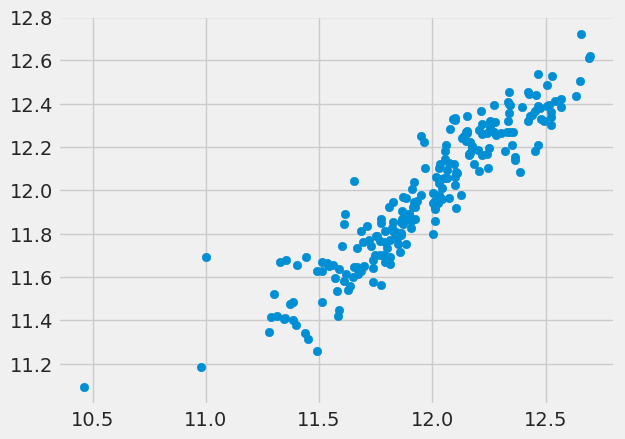

MAE: 0.09679495980883399
MSE: 0.01776372124348488
RMSE: 0.1332806109060312

Accuracy : 0.8618869887417928


In [97]:

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test)

#Scatterplot
plt.scatter(y_test, lm_predictions)
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

#Accuracy
print("\nAccuracy : {}".format(lm.score(X_test,y_test)))


#Outcome:

This scatter plot shows a strong positive correlation between two variables. As the value of one variable increases, the value of the other variable also increases. The points are clustered closely together, indicating a strong linear relationship.